#Importing Data From Kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d tongpython/cat-and-dog

 99% 215M/218M [00:02<00:00, 71.7MB/s]
100% 218M/218M [00:02<00:00, 84.2MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.keras as keras
from keras.models import Model
from keras.layers import Dense, Dropout , Conv2D , GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator


## Making a Base Model from MobileNet

In [5]:
base_model = MobileNet(weights = 'imagenet' , include_top =False )

17225924/17225924 [==============================] - 0s 0us/step


In [6]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                         

#Modifing our Base Model as per our requirements

In [7]:
classes =2
x= base_model.output
x= GlobalAveragePooling2D(name ='avg_pool')(x)
x = Dropout(0.4)(x)
prediction = Dense(2,activation = 'softmax')(x)
model = Model(inputs = base_model.input , outputs =prediction)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                      

In [9]:
for layer in base_model.layers:
  layer.trainable = False

model.compile(optimizer = 'adam' , loss ='categorical_crossentropy' , metrics = ['accuracy'])

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                      

#Getting no of categories for out problem statement

In [11]:
import os                   
os.listdir('training_set/training_set')

['cats', 'dogs']

#Doing Data Augmentation

In [12]:
width = 299
height = 299
batch = 32
train_dir = '/content/training_set/training_set'
test_dir = '/content/test_set/test_set'
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range =40,
    width_shift_range = 0.2,
    height_shift_range =0.2,
    shear_range =0.2,
    zoom_range = 0.2,
    horizontal_flip =True,
    fill_mode = 'nearest'
     )

test_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    rotation_range =40,
    width_shift_range = 0.2,
    height_shift_range =0.2,
    shear_range =0.2,
    zoom_range = 0.2,
    horizontal_flip =True,
    fill_mode = 'nearest'
     )

In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir ,
    target_size =(height , width),
    batch_size = batch,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir ,
    target_size =(height , width),
    batch_size = batch,
    class_mode = 'categorical'
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [14]:
data = next(train_generator)

In [15]:
steps_per_epoch = train_generator.n//train_generator.batch_size
steps_per_epoch

250

#Training and Testing Model

In [16]:
model.fit(train_generator , epochs =5 , validation_data = test_generator , steps_per_epoch =steps_per_epoch,  verbose =1)

Epoch 1/5
250/250 [==============================] - 227s 871ms/step - loss: 0.2420 - accuracy: 0.8953 - val_loss: 0.0993 - val_accuracy: 0.9654
Epoch 2/5
250/250 [==============================] - 218s 874ms/step - loss: 0.1165 - accuracy: 0.9543 - val_loss: 0.0706 - val_accuracy: 0.9758
Epoch 3/5
250/250 [==============================] - 215s 861ms/step - loss: 0.0950 - accuracy: 0.9638 - val_loss: 0.0622 - val_accuracy: 0.9792
Epoch 4/5
250/250 [==============================] - 225s 899ms/step - loss: 0.0975 - accuracy: 0.9590 - val_loss: 0.0615 - val_accuracy: 0.9787
Epoch 5/5
250/250 [==============================] - 217s 868ms/step - loss: 0.0947 - accuracy: 0.9638 - val_loss: 0.0632 - val_accuracy: 0.9763


In [20]:
img = keras.utils.load_img('/content/dog.jpg',target_size =(299,299))

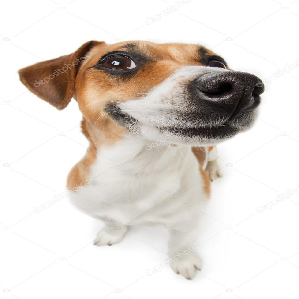

In [21]:
img

In [22]:
img = keras.utils.img_to_array(img)

In [23]:
img.shape

(299, 299, 3)

In [24]:
img = preprocess_input(img)

In [25]:
x = np.expand_dims(img,axis = 0)

In [26]:
x.shape

(1, 299, 299, 3)

In [27]:
pred = model.predict(x)

1/1 [==============================] - 1s 893ms/step


In [28]:
pred

array([[4.1354364e-05, 9.9995863e-01]], dtype=float32)

In [29]:
os.listdir('training_set/training_set')

['cats', 'dogs']

#Importing model to pickle file

In [30]:
import pickle

In [31]:
with open('model.pkl','wb') as file:
  pickle.dump(model,file)